<a href="https://colab.research.google.com/github/fedhere/MLPNS_FBianco/blob/main/NeuralNetworks/NN_fron_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl

In [ ]:
# input data
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

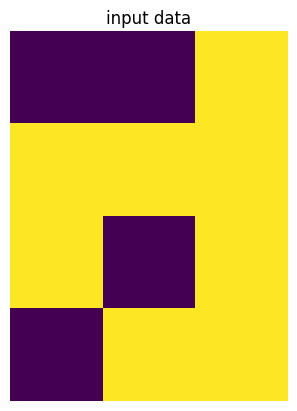

In [ ]:
pl.imshow(X);
pl.axis('off');
pl.title("input data");

In [ ]:
# output data
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
y.shape

(4, 1)

In [ ]:
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


# basic architecture: 1 layer
4 osservazioni

3 neuroni

1 layer

In [ ]:
def sigmoid(x):
  ''' activation function
  Input: x array-like - the input from the neuron multilinear regression 
  Output: sigmoid value of each input '''
  return 1. / (1. + np.exp(-x))

In [ ]:
def dsigmoid(s):
  ''' functional form of the derivative of the sigmoid function:
  Input: the output of a layer (passed through the activation function: sigpoid(M-P neuron output))
  Output: the derivative at the output value'''
  return  s * (1. - s)

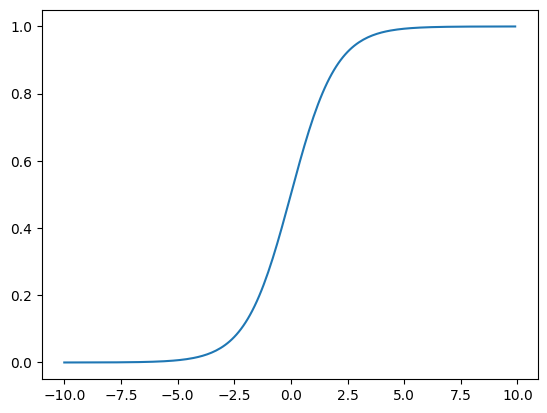

In [ ]:
pl.plot(np.arange(-10, 10, 0.1), sigmoid(np.arange(-10, 10, 0.1)));

In [ ]:
def loss(prediction, target):
  """ per neuron difference of target and data
  Input: 
  target : training labels
  prediction : array-like (same dimensions as target)"""
  return target - prediction

## Neural network 

In [ ]:

training = 6000

In [ ]:
# layer of synopses / neurons
# 4 x 3 dot 3 x 1 


In [ ]:
np.random.seed(302)

syn0 =  2 * np.random.random((3, 1)) - 1 #normalized 0-1
print(syn0.shape)
print(syn0)

loss_output = []

for iter in range(training):
  inputLayer = X
  
  # forward propagation

  #linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  #activations
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # backward propagation

  #caluclate correction
  output_delta = output_error * dsigmoid(output)
  #apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

(3, 1)
[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


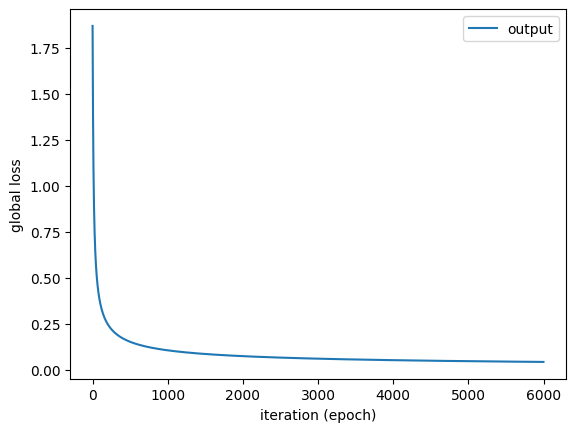

In [ ]:
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss");

In [ ]:
np.random.seed(302)

# 4x3 -> 3x5 ->5x1 => 4x1
syn0 =  2 * np.random.random((3, 5)) - 1 #normalized 0-1
syn1 =  2 * np.random.random((5, 1)) - 1 #normalized 0-1


loss_output = []
loss_hidden = []

for iter in range(training):
  inputLayer = X
  
  # forward propagation

  #linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  #activations
  hidden = sigmoid(l1)
  hidden_error = loss(hidden, y)
  loss_hidden.append(np.abs(hidden_error).sum())

  l2 = np.dot(hidden, syn1)
  #activations
  output = sigmoid(l2)

  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # backward propagation

  #caluclate correction
  output_delta = output_error * dsigmoid(output)
  hidden_delta = hidden_error * dsigmoid(hidden)

  #apply correction to weights
  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

output after training
 [[0.51014223]
 [0.96082801]
 [0.96106129]
 [0.50823968]]
output target
 [[0]
 [1]
 [1]
 [0]]


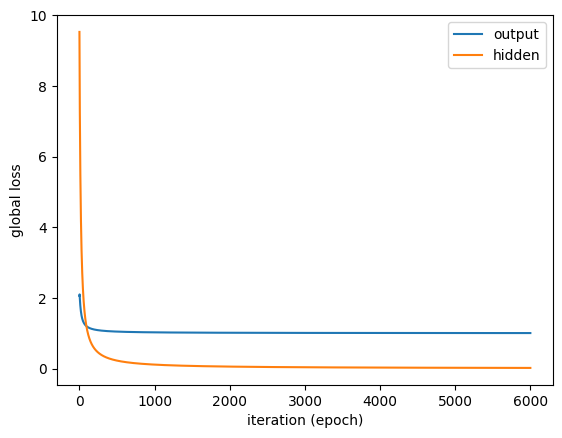

In [ ]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss");